# UCI machine learning repository

In [1]:
from matplotlib import pyplot as plt

from ada import *

In [2]:
def calibration(dataname, modelname, hyperparams, seed=50):
    (_, testset), _ = get_dataset(dataname, seed, validation=False, preparation=True)
    x_test, y_test = testset.tensors
    features = x_test.shape[-1]
    hyperparams["loss"] = "nll"
    k = hyperparams.get("k", 1)
    if k == 1:
        model = NeuralNetwork(features, hyperparams)
    else:
        model = MixtureDensityNetwork(features, hyperparams)
    model.load(modelname)
    y_pred = model.predict(testset)
    if k == 1:
        _, (ax1, ax2) = plt.subplots(nrows=2, constrained_layout=True)
        calibration_curve(ax2, normal_reliability(*y_pred, y_test))
        ax1.hist(normal_pit(*y_pred, y_test).squeeze(), bins=BINS)
        ax2.set_xlabel("prediction interval")
        ax2.set_ylabel("empirical fraction")
    else:
        _, ax1 = plt.subplots(constrained_layout=True)
        ax1.hist(gmm_pit(*y_pred, y_test).squeeze(), bins=BINS)
    ax1.set_xlabel("PIT")
    ax1.set_ylabel("count")

## boston

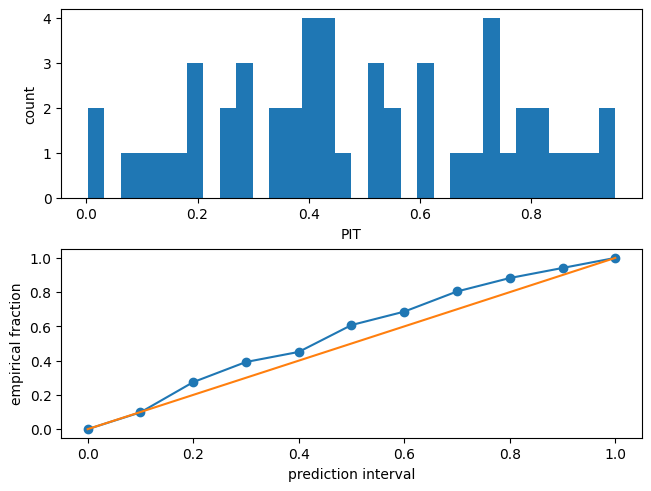

In [3]:
calibration("boston", "nll-1-1-1146", {"neurons": 4, "hiddens": 3})

## concrete

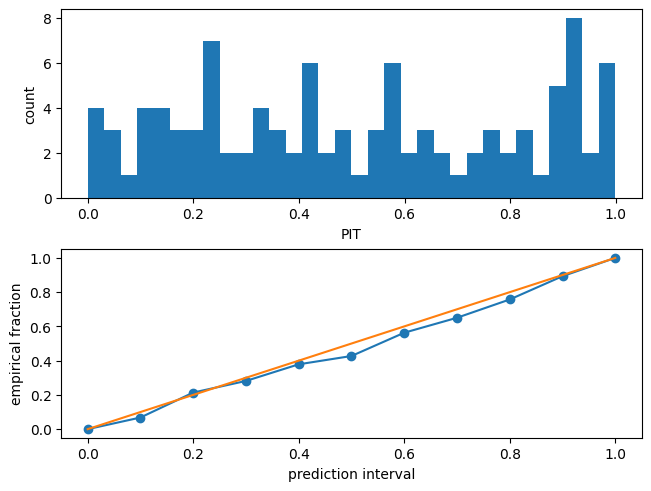

In [4]:
calibration("concrete", "nll-1-1-7605", {"neurons": 4, "hiddens": 3})

## energy

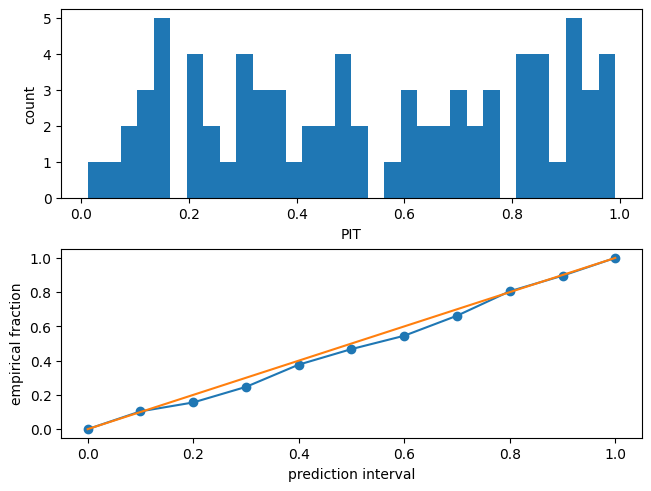

In [5]:
calibration("energy", "nll-1-1-2518", {"neurons": 4, "hiddens": 2})

## kin8nm

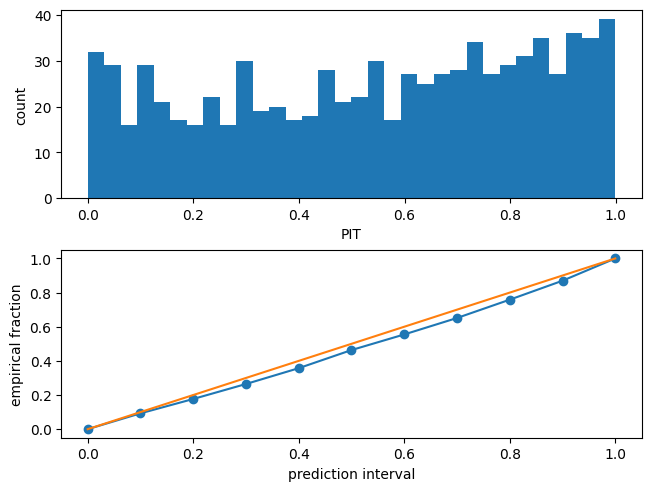

In [6]:
calibration("kin8nm", "nll-1-1-8241", {"neurons": 16, "hiddens": 2})

## power

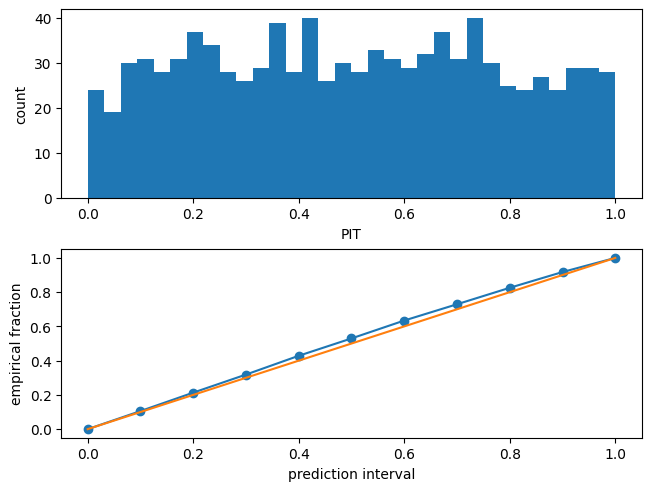

In [7]:
calibration("power", "nll-1-1-2853", {"neurons": 8, "hiddens": 4})

## protein

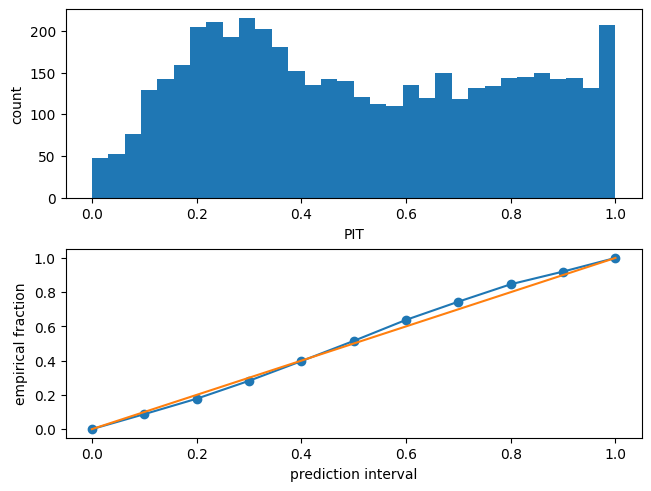

In [8]:
calibration("protein", "nll-1-1-7968", {"neurons": 64, "hiddens": 1})

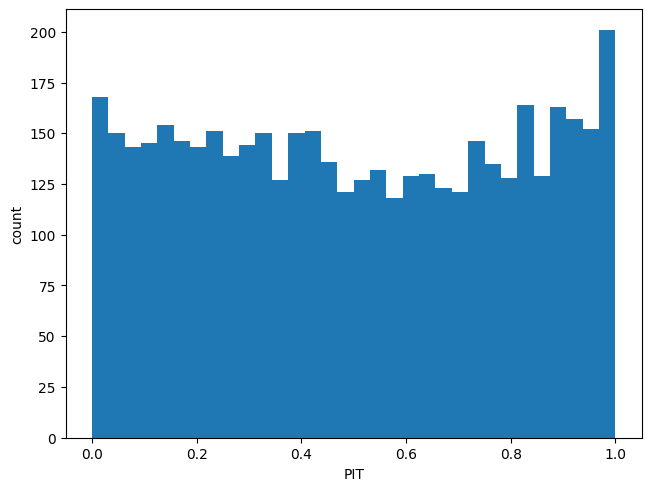

In [9]:
calibration("protein", "nll-1-5-2837", {"neurons": 64, "hiddens": 2, "k": 5})

<AxesSubplot: ylabel='Frequency'>

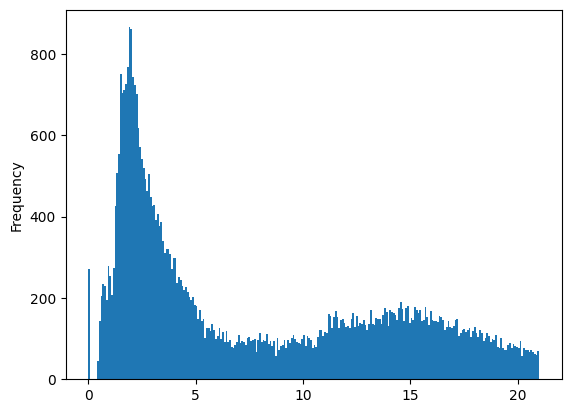

In [10]:
df, _, _ = get_protein()
df["RMSD"].plot.hist(bins=256)

## wine

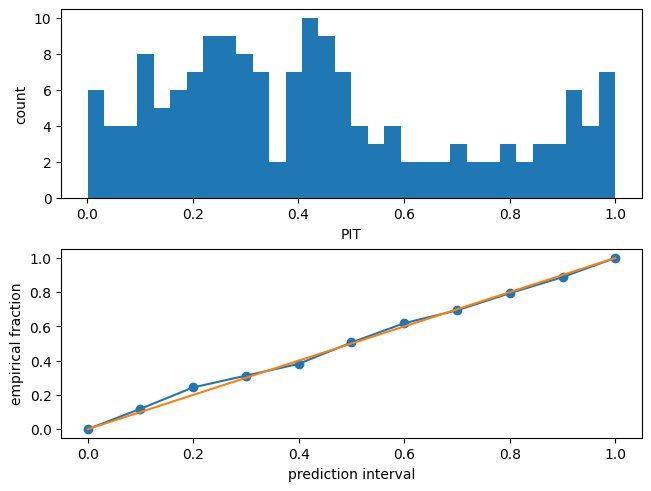

In [11]:
calibration("wine", "nll-1-1-4664", {"neurons": 8, "hiddens": 1})

<AxesSubplot: >

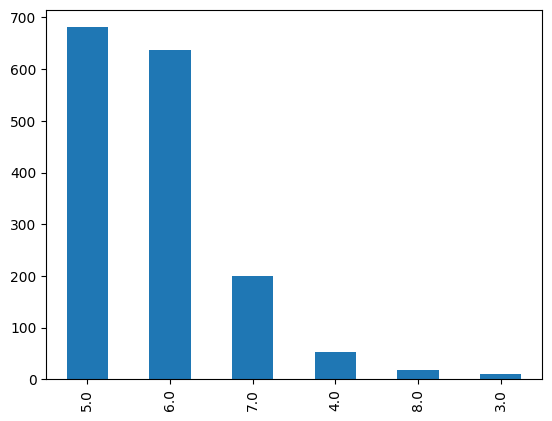

In [12]:
df, _, _ = get_wine()
df["quality"].value_counts().plot.bar()

## yacht

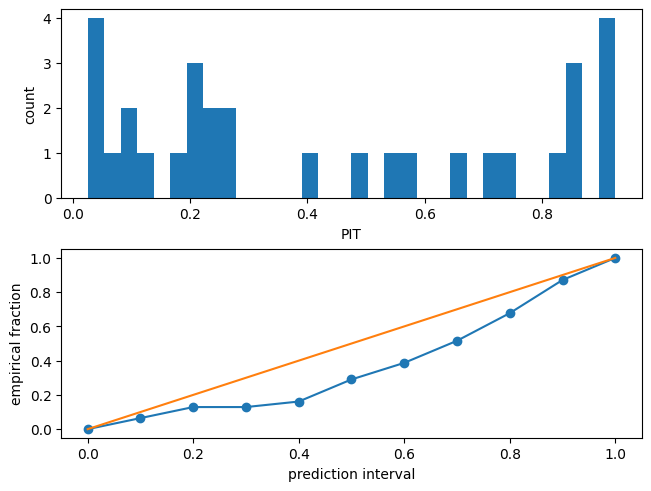

In [13]:
calibration("yacht", "nll-1-1-8884", {"neurons": 4, "hiddens": 4})

## year

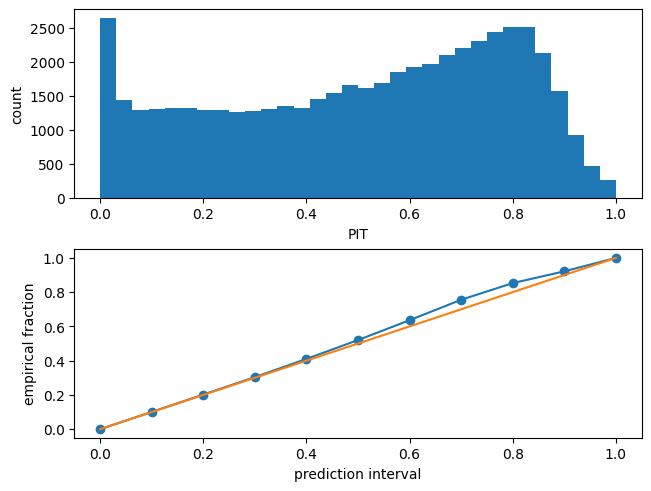

In [14]:
calibration("year", "nll-1-1-4569", {"neurons": 32, "hiddens": 3})

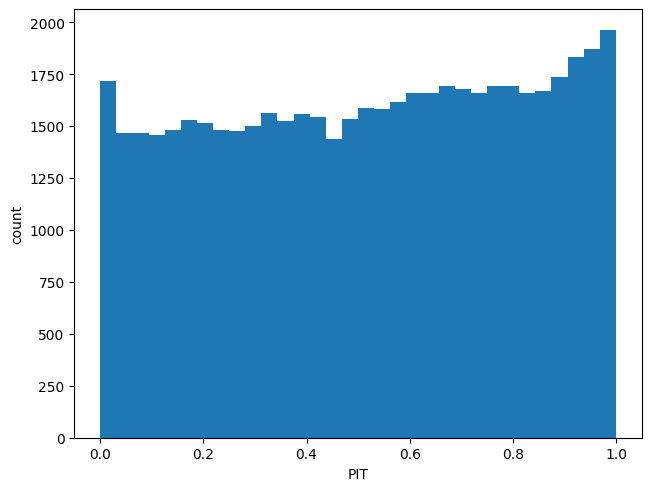

In [15]:
calibration("year", "nll-1-5-3344", {"neurons": 64, "hiddens": 5, "k": 5})

array([1922., 1924., 1925., 1926., 1927., 1928., 1929., 1930., 1931.,
       1932., 1933., 1934., 1935., 1936., 1937., 1938., 1939., 1940.,
       1941., 1942., 1943., 1944., 1945., 1946., 1947., 1948., 1949.,
       1950., 1951., 1952., 1953., 1954., 1955., 1956., 1957., 1958.,
       1959., 1960., 1961., 1962., 1963., 1964., 1965., 1966., 1967.,
       1968., 1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976.,
       1977., 1978., 1979., 1980., 1981., 1982., 1983., 1984., 1985.,
       1986., 1987., 1988., 1989., 1990., 1991., 1992., 1993., 1994.,
       1995., 1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003.,
       2004., 2005., 2006., 2007., 2008., 2009., 2010., 2011.],
      dtype=float32)

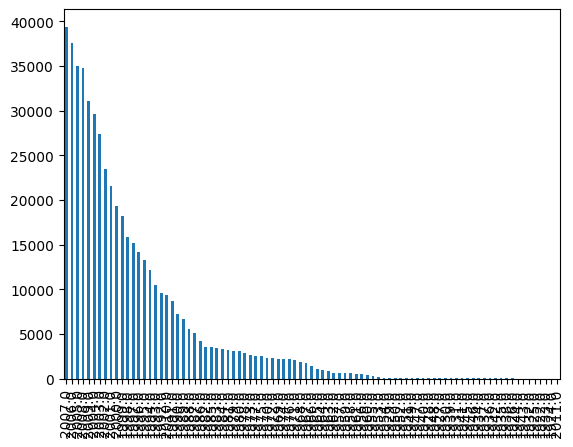

In [16]:
df, _, _ = get_year()
df[0].value_counts().plot.bar()
np.sort(df[0].unique())